In [1]:
import numpy as np
import pandas as pd

import sklearn.neighbors as neighbors

from importlib import reload
import copy
import synthetic.render.generator as gen

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import multiprocessing as mp

import sys
import os
import math
import logging
import time
import galsim
import fitsio as fio

import ngmix

import synthetic.render.render as render
import synthetic.render.icl as icl
import synthetic.render.frame as frame

import images
import meds
import subprocess

In [3]:
catalogs = []
catalog_tag = '/e/ocean1/users/vargatn/DES/SIM_DATA/SKY_MODEL_EPSILON/res_clust_v2_z0l0/epsilon_clust_v8-z0l0_15000_{:03d}.fits'
for i in np.arange(1):
    fname = catalog_tag.format(i)
    data = fio.read(fname)
    catalog_cluster = data[data['LOC'] == 1]
    catalog_field = data[data['LOC'] == 0]
    catalog = np.hstack((catalog_cluster, catalog_field))
    catalog['G1'] = 0.3
    catalog['G2'] = -0.2
    catalogs.append(catalog)

In [4]:

i = 0
name = 'canvas_{:03d}'.format(i)
print(name)
fr = frame.Frame(catalog, name=name, noise_std=4)
fr.render()
fr.extract()

canvas_000
starting xshear calculations in 100 processes


In [5]:
fio.read_header('canvas_000.fits')


SIMPLE  =                    T / conforms to FITS standard
BITPIX  =                  -32 / array data type
NAXIS   =                    2 / number of array dimensions
NAXIS1  =                 5000 / 
NAXIS2  =                 5000 / 
EXTEND  =                    T / 
GS_XMIN =                    1 / GalSim image minimum x coordinate
GS_YMIN =                    1 / GalSim image minimum y coordinate
GS_WCS  = 'GSFitsWCS'          / GalSim WCS name
CTYPE1  = 'RA---TAN'           / 
CTYPE2  = 'DEC--TAN'           / 
CRPIX1  =               2500.5 / 
CRPIX2  =               2500.5 / 
CD1_1   = -7.3333333333333E-05 / 
CD1_2   =                  0.0 / 
CD2_1   =                  0.0 / 
CD2_2   = 7.33333333333333E-05 / 
CUNIT1  = 'deg'                / 
CUNIT2  = 'deg'                / 
CRVAL1  =                 90.0 / 
CRVAL2  =                  0.0 / 

In [6]:
nobj = len(fr.scat)

In [7]:
nobj

9386

In [8]:
dec = fr.scat["DELTA_J2000"]
ra = fr.scat['ALPHA_J2000']

In [9]:
box_size = np.ones(nobj) * 32

In [11]:
obj_data = meds.util.get_meds_input_struct(nobj)
obj_data['id'] = fr.scat['NUMBER']
obj_data['box_size'] = np.ones(nobj) * 32
obj_data['ra'] = fr.scat['ALPHA_J2000']
obj_data['dec'] = fr.scat['DELTA_J2000']

In [12]:
obj_data

array([(   1, 32, 89.99925421, -0.1669937 ),
       (   2, 32, 90.00496231, -0.16528172),
       (   3, 32, 89.99873047, -0.16589109), ...,
       (9384, 32, 90.09072898,  0.12249217),
       (9385, 32, 90.01605933,  0.12911593),
       (9386, 32, 90.11096888,  0.12514247)],
      dtype=[('id', '<i8'), ('box_size', '<i8'), ('ra', '<f8'), ('dec', '<f8')])

In [13]:
nimage = 1
path_len = len('./canvas_000.fits')

In [14]:
image_info= meds.util.get_image_info_struct(nimage, path_len)

In [15]:

image_info['image_path'][0] = r'./canvas_000.fits'
image_info['magzp'] = 30.

In [16]:
image_info

array([(b'./canvas_000.fits', 0, b'', 0, b'', 0, b'', 0, b'', 0, 0, 0, 30., 1., 0.)],
      dtype=[('image_path', 'S17'), ('image_ext', '<i2'), ('weight_path', 'S17'), ('weight_ext', '<i2'), ('seg_path', 'S17'), ('seg_ext', '<i2'), ('bmask_path', 'S17'), ('bmask_ext', '<i2'), ('bkg_path', 'S17'), ('bkg_ext', '<i2'), ('image_id', '<i8'), ('image_flags', '<i8'), ('magzp', '<f4'), ('scale', '<f4'), ('position_offset', '<f8')])

In [17]:
m = meds.MEDS('gauss_uberseg_meds.fits.fz')

In [18]:
mm = meds.MEDSMaker(obj_data=obj_data, image_info=image_info)

writing cutouts for: ['image']


In [19]:
mm.write("testmeds.fits")

file    1 of    1: 'b'./canvas_000.fits''
    first cut:    9386 of   9386 objects
    second cut:   9386 of   9386 objects
    pre-forced obj row range (min, max - image row max):   2.233068e+02 -2.230303e+02
    pre-forced obj col range (min, max - image col max):   2.231887e+02 -2.254646e+02
    post-forced obj row range (min, max - image row max):  2.233068e+02 -2.230303e+02
    post-forced obj col range (min, max - image col max):  2.231887e+02 -2.254646e+02
    # of objects forced into coadd: 0
9386/9386 had ncut > 0
setting start rows and pixel count
total pixels: 9611264
meds layout build time: 0.159941 seconds
opening output MEDS file: 'testmeds.fits'
writing object_data
writing image_info
writing metadata
    reserving image mosaic
writing image cutouts
    1/1 image b'./canvas_000.fits'


/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/site-packages/meds/util.py:380: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  phat = numpy.array([-1.0*sinp,cosp,0.0]).T


    no background for image
output is in: testmeds.fits


In [20]:
m = meds.MEDS('testmeds.fits')

In [23]:
im = m.get_cutout(0, 0, )

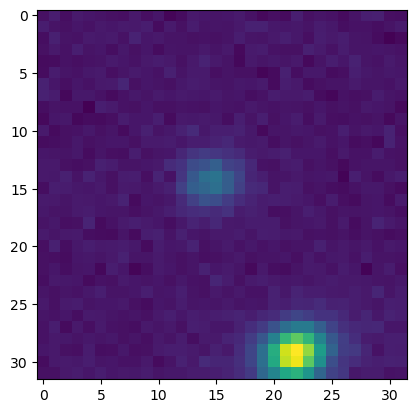

In [24]:
plt.imshow(im)

In [70]:
wcs_data = fio.read_header('./canvas_000.fits')

In [62]:
wcs_data


SIMPLE  =                    T / conforms to FITS standard
BITPIX  =                  -32 / array data type
NAXIS   =                    2 / number of array dimensions
NAXIS1  =                 5000
NAXIS2  =                 5000
EXTEND  =                    T
GS_XMIN =                    1 / GalSim image minimum x coordinate
GS_YMIN =                    1 / GalSim image minimum y coordinate
GS_WCS  = 'GSFitsWCS'          / GalSim WCS name
CTYPE1  = 'RA---TAN'
CTYPE2  = 'DEC--TAN'
CRPIX1  =               2500.5
CRPIX2  =               2500.5
CD1_1   = -7.3333333333333E-05
CD1_2   =                  0.0
CD2_1   =                  0.0
CD2_2   = 7.33333333333333E-05
CUNIT1  = 'deg     '
CUNIT2  = 'deg     '
CRVAL1  =                 90.0
CRVAL2  =                  0.0